# Aula 12 - processamento de linguagem natural (NLP)

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) NLP
- 2) Pré-processamento
    - 2.1) Remoção de pontuação
    - 2.2) Tokenização
    - 2.3) Text Normalization
        - 2.3.1) Case lowering
        - 2.3.2) Lemmatização
        - 2.3.3) Remoção de StopWords
        - 2.3.4) Voltando para strings
- 3) Corpus
- 4) Modelo de representação: Bag of Words
- 5) Modelo de representação: TF-IDF
- 6) Curva AUC-ROC (AUROC)


_____
_____
_____

# 1) NLP

O **processamento de linguagem natural** ou **NLP (Natural Language Processing)**, consiste no processamento de dados da linguagem humana (como texto, áudios transcritos, etc.)

E através de técnicas de NLP que é possível construir **tradutores**, **chatbots**, **sistemas de reconhecimento de voz**, **análise de sentimento** e tantas outras aplicações!

<img src="https://d35fo82fjcw0y8.cloudfront.net/2019/05/27153113/what-is-natural-language-processing.jpg" width=400>

Nesta aula, iremos ver as técnicas mais comuns para se tratar textos, extrair informações e **construir modelos preditivos a partir de dados textuais**.

A biblioteca que iremos utilizar para algumas destas tarefas é a [NLTK](https://www.nltk.org/).

______

In [1]:
# importe as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos direto pro nosso exemplo pra introduzir cada uma das ideias de NLP!

Utilizaremos uma [base de dados](https://www.kaggle.com/shravan3273/natural-language-processing) que tem apenas duas colunas: uma com o **texto de uma mensagem**, e uma coluna que indica se a mensagem **é spam ou ham**.

In [2]:
# leia os dados, em '../datasets/spamraw.csv'

df = pd.read_csv("../datasets/spamraw.csv")

In [3]:
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [4]:
df.loc[3, "text"]

'complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [6]:
# dando uma olhada na distribuição do target

df["type"].value_counts()

ham     4812
spam     747
Name: type, dtype: int64

Há um enorme desbalanço no target! Como fizemos antes, seguiremos com o **undersampling**

In [7]:
def undersample(df, column_name = 'y'):

    # capta o número de instâncias que cada classe vai passar a ter
    # no undersampling, pegando o número de elementos na classe minoritária
    n = df[column_name].value_counts().min()
      
    # cria um novo dataframe com as colunas do df original
    new_df = pd.DataFrame()
    
    # esse loop percorre todos os valores unicos da coluna a ser reamostrada
    for x in df[column_name].unique():
        
        filtered_df = df[df[column_name] == x]
            
        new_df = pd.concat([new_df, filtered_df.sample(n, random_state=42)])
        
    return new_df

# realize o undersampling estratificado
df_resamp = undersample(df, 'type')

In [8]:
df_resamp["type"].value_counts()

ham     747
spam    747
Name: type, dtype: int64

In [9]:
df = df_resamp.copy()

# separando as features e o target
X = df["text"]
y = df["type"]

# criando uma cópia para compararmos abaixo após as modificações
X_orig = X.copy()

Vamos agora conhecer e aplicar as técnicas de NLP!

As primeiras técnicas serão aplicadas no **pré-processamento** dos dados textuais

____
____
____

## 2) Pré-processamento

Vamos ver agora as principais etapas e ferramentas de **pré-processamento de dados textuais!**

### 2.1) Remoção de pontuação

Na grande parte dos casos, as pontuações (!,?. etc) não são de interesse, e podem ser tiradas dos textos.

Assim, o **primeiro passo** do pré-processamento costuma ser uma limpeza de pontuação:

In [10]:
texto = "essa, aqui, é uma frase com: algumas pontuações!!; (será que é mesmo?)"

import string

texto.translate(str.maketrans('', '', string.punctuation))

'essa aqui é uma frase com algumas pontuações será que é mesmo'

In [11]:
X

5330                    Yay can't wait to party together!
4615                               You got called a tool?
916     Still chance there. If you search hard you wil...
1189    Dai what this da.. Can i send my resume to thi...
11                                      I anything lor...
                              ...                        
553     This is the 2nd time we have tried 2 contact u...
789     Dear Voucher Holder, 2 claim this weeks offer,...
2039    FREE entry into our £250 weekly comp just send...
3274    URGENT! Your Mobile No. was awarded £2000 Bonu...
768     money!!! you r a lucky winner ! 2 claim your p...
Name: text, Length: 1494, dtype: object

In [12]:
import string

# elimina pontuações
X = X.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))    

In [13]:
# # ou então, utilizando regex:

# import re

# # elimina pontuações
# X.apply(lambda x: re.sub("[^a-zA-Z0-9 ]", "", x))

In [14]:
X

5330                      Yay cant wait to party together
4615                                You got called a tool
916     Still chance there If you search hard you will...
1189     Dai what this da Can i send my resume to this id
11                                         I anything lor
                              ...                        
553     This is the 2nd time we have tried 2 contact u...
789     Dear Voucher Holder 2 claim this weeks offer a...
2039    FREE entry into our £250 weekly comp just send...
3274    URGENT Your Mobile No was awarded £2000 Bonus ...
768     money you r a lucky winner  2 claim your prize...
Name: text, Length: 1494, dtype: object

### 2.2) Tokenização

Processo de transformação do texto em "pedaços"

<img src="https://miro.medium.com/max/2414/1*UhfwmhMN9sdfcWIbO5_tGg.jpeg" width=400>


O que será cada **token** é variável: pode ser um único caractere, uma única palavra, algumas palavras, ou até mesmo frases inteiras.

Seguiremos no que é o mais comum: utilizar **cada palavra como um token**


In [15]:
"uma string separada em lista".split()

['uma', 'string', 'separada', 'em', 'lista']

In [16]:
X.apply(lambda x: x.split())

5330               [Yay, cant, wait, to, party, together]
4615                          [You, got, called, a, tool]
916     [Still, chance, there, If, you, search, hard, ...
1189    [Dai, what, this, da, Can, i, send, my, resume...
11                                     [I, anything, lor]
                              ...                        
553     [This, is, the, 2nd, time, we, have, tried, 2,...
789     [Dear, Voucher, Holder, 2, claim, this, weeks,...
2039    [FREE, entry, into, our, £250, weekly, comp, j...
3274    [URGENT, Your, Mobile, No, was, awarded, £2000...
768     [money, you, r, a, lucky, winner, 2, claim, yo...
Name: text, Length: 1494, dtype: object

In [17]:
X = X.apply(lambda x: x.split())

In [18]:
# comparando...

idx = 52
print('\nOriginal:')
print(X_orig.iloc[idx])
print('\nApós a tokenização:')
print(X.iloc[idx])

print("\nLabel:", y.iloc[idx])


Original:
Hey you still want to go for yogasana? Coz if we end at cine then can go bathe and hav the steam bath

Após a tokenização:
['Hey', 'you', 'still', 'want', 'to', 'go', 'for', 'yogasana', 'Coz', 'if', 'we', 'end', 'at', 'cine', 'then', 'can', 'go', 'bathe', 'and', 'hav', 'the', 'steam', 'bath']

Label: ham


### 2.3) Text Normalization

**Text normalization** é o procedimento que consiste em **padronizar** o texto, de modo a evitar que variações tornem os modelos demasiadamente complexos. Por exemplo: tratar singular/plural como a mesma coisa, ou então eliminar conjugação de verbos. Outras componentes comuns do text normalization é a de eliminar palavras que não agregam muito significado, ou palavras muito raras.

Abaixo alguns exemplos de ações de Text Normalization que podem ser aplicadas no pré-processamento de dados textuais:

**Stemming** - Redução de tokens à sua raiz invariante através da **remoção de prefixos ou sufixos**. Baseado em heurística<br>
**Lemmatization** - Redução de tokens à sua raiz invariante através da **análise linguística do token**. Baseado em dicionário léxico<br>

<img src="https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f" width=400>


**Remoção de Stopwords** - Extração de palavras com baixo poder informativo<br>
**Case Lowering** - Deixa seu texto case-insensitive, reduzindo o número de dimensões 


O text normalization também é fundamental no **uso de modelos treinados**: Quando alguem digita "resume" no google, a intenção era achar a palavra "résumé", então o processo de normalização é importante para tratar o input de dados!

### 2.3.1) Case lowering

Vamos começar **deixando todos os tokens em letra minúscula**

In [19]:
X

5330               [Yay, cant, wait, to, party, together]
4615                          [You, got, called, a, tool]
916     [Still, chance, there, If, you, search, hard, ...
1189    [Dai, what, this, da, Can, i, send, my, resume...
11                                     [I, anything, lor]
                              ...                        
553     [This, is, the, 2nd, time, we, have, tried, 2,...
789     [Dear, Voucher, Holder, 2, claim, this, weeks,...
2039    [FREE, entry, into, our, £250, weekly, comp, j...
3274    [URGENT, Your, Mobile, No, was, awarded, £2000...
768     [money, you, r, a, lucky, winner, 2, claim, yo...
Name: text, Length: 1494, dtype: object

In [20]:
X.apply(lambda lista: [token.lower() for token in lista])

5330               [yay, cant, wait, to, party, together]
4615                          [you, got, called, a, tool]
916     [still, chance, there, if, you, search, hard, ...
1189    [dai, what, this, da, can, i, send, my, resume...
11                                     [i, anything, lor]
                              ...                        
553     [this, is, the, 2nd, time, we, have, tried, 2,...
789     [dear, voucher, holder, 2, claim, this, weeks,...
2039    [free, entry, into, our, £250, weekly, comp, j...
3274    [urgent, your, mobile, no, was, awarded, £2000...
768     [money, you, r, a, lucky, winner, 2, claim, yo...
Name: text, Length: 1494, dtype: object

In [21]:
X = X.apply(lambda x: [token.lower() for token in x])

In [22]:
# comparando...

idx = 42
print('\nOriginal:')
print(X_orig.iloc[idx])
print('\nApós a tokenização + lower:')
print(X.iloc[idx])

print("\nLabel:", y.iloc[idx])


Original:
Aiyah ok wat as long as got improve can already wat...

Após a tokenização + lower:
['aiyah', 'ok', 'wat', 'as', 'long', 'as', 'got', 'improve', 'can', 'already', 'wat']

Label: ham


### 2.3.2) Lematização

Vamos agora fazer o processo de lemmatização.

Como discutimos acima, o processo de lemmatização precisa de uma espécie de "dicionário" para a análise linguística do token, e sua substituição pelo lemma.

A NLTK contém este dicionário: o [WordNet](https://www.nltk.org/howto/wordnet.html), que é um "banco de dados lexical de relações semânticas entre palavras em mais de 200 idiomas. O WordNet vincula palavras a relações semânticas, incluindo sinônimos, hiponímias e merônimos. Os sinônimos são agrupados em sincronizações com definições breves e exemplos de uso".


In [23]:
# import these modules 
from nltk.stem import WordNetLemmatizer 
from nltk import download

# na primeira vez, é necessário baixar o wordnet
# após a primeira vez, pode comentar a linha abaixo
download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 

# argumento "pos" indica a qual classe gramatical o token pertence
print("running :", lemmatizer.lemmatize("running", pos = "v")) 
print("went :", lemmatizer.lemmatize("went", pos = 'v'))

rocks : rock
corpora : corpus
running : run
went : go


Para identificarmos automaticamente a classe gramatical (**part of speech**), podemos usar a função `pos_tag`

In [25]:
from nltk import pos_tag

# o código abaixo baixa o pos_tagger
download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Andre\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
import nltk

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Andre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
print(pos_tag(["running"]))
print(pos_tag(["rocks"]))
print(pos_tag(["better"]))
print(pos_tag(["nice"]))

[('running', 'VBG')]
[('rocks', 'NNS')]
[('better', 'RBR')]
[('nice', 'JJ')]


Mas o argumento "pos" do wordnet deve ser algumas das classes gramaticais. Segundo [esta lista](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html), vamos utilizar a seguinte conversão:

In [28]:
# dicionário de conversão

# função usada pro valor padrão do dicionário
from collections import defaultdict

from nltk.corpus import wordnet as wn

# se houver qualquer outro valor de chave, dizemos que será NOUN
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['N'] = wn.NOUN
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [29]:
tag_map

defaultdict(<function __main__.<lambda>()>,
            {'N': 'n', 'J': 'a', 'V': 'v', 'R': 'r'})

As chaves do dicionário devem ser **a primeira letra** da tag!

In [30]:
text = "Another way of achieving this tasks"
tokens = text.split()

print("\nFrase tokenizada:", tokens, "\n\n")

for token in tokens:
    
    pos = pos_tag([token])[0][1]
    
#     print(token, pos_tag([token]), pos, pos[0])
    
    lemma = lemmatizer.lemmatize(token, tag_map[pos[0]])
    
    print(token, "=>", lemma)


Frase tokenizada: ['Another', 'way', 'of', 'achieving', 'this', 'tasks'] 


Another => Another
way => way
of => of
achieving => achieve
this => this
tasks => task


Assim, podemos fazer:

In [31]:
X = X.apply(lambda x: [lemmatizer.lemmatize(token, tag_map[pos_tag([token])[0][1][0]]) for token in x])

In [32]:
# comparando...

idx = 10
print('\nOriginal:')
print(X_orig.iloc[idx])
print('\nApós a tokenização + lower + lematização:')
print(X.iloc[idx])

print("\nLabel:", y.iloc[idx])


Original:
It does it on its own. Most of the time it fixes my spelling. But sometimes it gets a completely diff word. Go figure

Após a tokenização + lower + lematização:
['it', 'do', 'it', 'on', 'it', 'own', 'most', 'of', 'the', 'time', 'it', 'fix', 'my', 'spell', 'but', 'sometimes', 'it', 'get', 'a', 'completely', 'diff', 'word', 'go', 'figure']

Label: ham


### 2.3.3) Remoção de StopWords

Quando vamos realizar análise de textos, normalmente é comum **filtrarmos palavras com pouco valor semântico**, como por exemplo **artigos e preposições**, pois estas palavras não agregam tanta informação ao texto.

Estas palavras são conhecidas como **"stopwords"**;

Abaixo iremos fazer download de uma lista recomendada de stopwords em inglês e depois extrairemos essas palavras do texto!

In [33]:
from nltk.corpus import stopwords

# vaixando a lista de stopwords
download('stopwords')

# criando uma lista com as stopwords do ingles
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
print('Stopwords em inglês:\n')
print(stopwords_list)

Stopwords em inglês:

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

In [35]:
X.apply(lambda x: [token for token in x if token not in stopwords_list])

5330                   [yay, cant, wait, party, together]
4615                                    [get, call, tool]
916        [still, chance, search, hard, get, itlet, try]
1189                          [dai, da, send, resume, id]
11                                        [anything, lor]
                              ...                        
553     [2nd, time, try, 2, contact, u, u, 750, pound,...
789     [dear, voucher, holder, 2, claim, week, offer,...
2039    [free, entry, £250, weekly, comp, send, word, ...
3274    [urgent, mobile, award, £2000, bonus, caller, ...
768     [money, r, lucky, winner, 2, claim, prize, tex...
Name: text, Length: 1494, dtype: object

In [36]:
X = X.apply(lambda x: [token for token in x if token not in stopwords_list])

In [37]:
# comparando...

idx = 5
print('\nOriginal:')
print(X_orig.iloc[idx])
print('\nApós a tokenização + lower + lematização + remoção de stopwords:')
print(X.iloc[idx])

print("\nLabel:", y.iloc[idx])


Original:
DO NOT B LATE LOVE MUM

Após a tokenização + lower + lematização + remoção de stopwords:
['b', 'late', 'love', 'mum']

Label: ham


### 2.3.4) Voltando para strings

Após ter realizado todas as etapas de pré-processamento, é muito comum que voltemos a lista de tokens pré-processados para strings, como se fosse um "ciclo" de pré-processamento! Ou seja, fazemos um processo de "destokenização"

In [38]:
X.apply(lambda x: " ".join(x))

5330                         yay cant wait party together
4615                                        get call tool
916                still chance search hard get itlet try
1189                                dai da send resume id
11                                           anything lor
                              ...                        
553     2nd time try 2 contact u u 750 pound prize 2 c...
789     dear voucher holder 2 claim week offer pc go h...
2039    free entry £250 weekly comp send word enter 84...
3274    urgent mobile award £2000 bonus caller prize 5...
768     money r lucky winner 2 claim prize text money ...
Name: text, Length: 1494, dtype: object

In [39]:
X = X.apply(lambda x: " ".join(x))

In [40]:
# comparando...

idx = 5
print('\nOriginal:')
print(X_orig.iloc[idx])
print('\nApós o pipeline completo de pré-processamento:')
print(X.iloc[idx])

print("\nLabel:", y.iloc[idx])


Original:
DO NOT B LATE LOVE MUM

Após o pipeline completo de pré-processamento:
b late love mum

Label: ham


Aqui terminamos nosso fluxo de pre-processamento de texto!

Para resumir, vamos criar uma única função com todas as **etapas de pré-processamento textual** que fizemos acima!

Essa função será nosso "pipeline de pré-processamento textual"!

A função vai contar com alguns argumentos booleanos com o fim de determinar quais estapas do pré-processamento devem ser realizadas.

In [41]:
def pre_process_pipeline(X, remove_pontuacao=True, lower=True, lemmatize=True, remove_stopwords=True):   
    
    if remove_pontuacao:
        
        import string

        # elimina pontuações
        X = X.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))    
    
    #############################################################################
    
    # essa é a única etapa obrigatória
    X = X.apply(lambda x: x.split())

    #############################################################################

    if lower:

        X = X.apply(lambda x: [token.lower() for token in x])


    #############################################################################

    if lemmatize:

        from collections import defaultdict
        from nltk.corpus import wordnet as wn

        tag_map = defaultdict(lambda : wn.NOUN)
        tag_map['N'] = wn.NOUN
        tag_map['J'] = wn.ADJ
        tag_map['V'] = wn.VERB
        tag_map['R'] = wn.ADV

        from nltk.stem import WordNetLemmatizer 

        lemmatizer = WordNetLemmatizer()

        X = X.apply(lambda x: [lemmatizer.lemmatize(token, tag_map[pos_tag([token])[0][1][0]]) for token in x])

    #############################################################################

    if remove_stopwords:

        from nltk.corpus import stopwords

        stopwords_list = stopwords.words('english')

        X = X.apply(lambda x: [token for token in x if token not in stopwords_list])

    #############################################################################
    
    X = X.apply(lambda x: " ".join(x))
    
    #############################################################################
    
    return X

In [42]:
# redefinindo os dados

df = df_resamp.copy()

X = df["text"]
y = df["type"]

In [43]:
X = pre_process_pipeline(X)

In [44]:
# comparando...

idx = 5
print('\nOriginal:')
print(X_orig.iloc[idx])
print('\nApós o pipeline completo de pré-processamento:')
print(X.iloc[idx])

print("\nLabel:", y.iloc[idx])


Original:
DO NOT B LATE LOVE MUM

Após o pipeline completo de pré-processamento:
b late love mum

Label: ham


_________
___________
_________

## 3) Corpus

Com isso chegamos ao fim do pré-processamento, uma das etapas mais importantes de todo projeto de NLP!

É importante ressaltar que a escolha das etapas de pré-processamento não é algo óbvio, dado que há muitas escolhas possíveis acerca do que se fazer para pré-processar os dados. Assim, o indicado é treinar diferentes modelos testando diferentes combinações das técnicas de pré-processamento, até que o melhor procedimento seja encontrado!

**Nomenclatura**: o conjunto de mensagens pré-processadas é chamado de **Corpus**.

### Vocabulário


O vocabulário do corpus nada mais é do que uma listagem das palavras individuais que aparecem no corpus. Para encontrar o vocabulário, basta contarmos a aparição de cada palavra isolada no corpus. Ao fim, teremos N palavras únicas que compõem nosso vocabulário.

In [45]:
#só pra ter uma ideia do vocabulário, vamos fazer uma lista de listas com o formato:
#vocabulario[i] = [palavra, numero_de_aparicoes_no_corpus]

vocabulario = []
for frase in X:
    for palavra in frase.split():
        
        #não queremos palavras de uma única letra (pode acontecer devido ao stemming...)
        if len(palavra) > 1:
            if palavra not in [x[0] for x in vocabulario]:
                vocabulario.append([palavra, 1])
            else:
                vocabulario[[x[0] for x in vocabulario].index(palavra)][1] += 1
            
print("\nO vocabulário é formado por N =", len(vocabulario), "palavras!")

#a partir do vocabulário, crio um dataframe com a contagem
vocab_count = pd.DataFrame({"palavra": [],
                            "count": []})

vocab_count["palavra"] = pd.Series(vocabulario).apply(lambda x: x[0])
vocab_count["count"] = pd.Series(vocabulario).apply(lambda x: x[1])
vocab_count = vocab_count.sort_values("count", ascending=False)

print("\nTemos a seguir as 10 mais comuns, com as respectivas contagens:")
display(vocab_count.head(10))


O vocabulário é formado por N = 4256 palavras!

Temos a seguir as 10 mais comuns, com as respectivas contagens:


,palavra,count
6,call,413
246,free,228
217,ur,193
5,get,187
1222,txt,153
40,text,152
487,mobile,136
57,go,123
203,stop,122
423,reply,120


____
____
____

## 4) Modelo de representação: Bag of Words

Após estudarmos o vocabulário, vamos efetivamente montar o modelo de bag-of-words. Este modelo funciona da seguinte forma:

- Pegue uma frase do corpus;
- Crie um vetor N-dimensional de inteiros (onde N é o número de palavras do vocabulário);
- Cada componente do vetor corresponde a uma palavra do vocabulário, segundo a ordem que as palavras aparecem no vocabulário.
- Preencha esse vetor com zeros (todas suas componentes serão 0);
- Para cada palavra da frase, mude a componente correspondente do vetor para 1;
- Faça isso para todas as frases do corpus;

Ao fim do processo acima para todas as frases do corpus (supomos que sejam M frases), nós empilhamos os respectivos vetores, de modo que teremos uma matriz de M linhas e N colunas. E essa matriz é o modelo final de bag-of-words, que por ser uma matriz numérica, pode ser facilmente usada como input pros modelos de machine learning!

Pra exemplificar o procedimento, vamos a um exemplo: suponha que nossa base de treino contenha as seguintes 3 frases **(M = 3)**:

["Yay can't wait to party together!",<br>
 'You got called a tool?',<br>
 'Still chance there. If you search hard you will get it..let have a try :)']

Após o pre-processamento inicial das frases, o corpus final fica sendo:

['yay cant wait party together',<br>
 'get call tool',<br>
 'still chance search hard get itlet try']

Olhando pro corpus, é fácil ver que nosso vocabulário é:

['wait',
 'itlet',
 'get',
 'still',
 'search',
 'call',
 'yay',
 'cant',
 'together',
 'tool',
 'hard',
 'try',
 'chance',
 'party']

É útil deixarmos o vocabulário em ordem alfabética:

['call',
 'cant',
 'chance',
 'get',
 'hard',
 'itlet',
 'party',
 'search',
 'still',
 'together',
 'tool',
 'try',
 'wait',
 'yay']
 
Temos **N = 14** palavras no vocabulário. 

O one-hot encoding de cada uma das frases do corpus irá, então, produzir um **vetor 14-dimensional** de 1 e 0, com 1 nas posições respectivas às palavras no vocabulário. Vamos entender:

Para a frase "yay cant wait party together", teremos um vetor com o numero 1 nas posições 13, 1, 12, 6, e 9 (respectivamente as posições de "yay", "cant", "wait", "party" e "together"), de forma que temos o vetor:

> "yay cant wait party together"" --> [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

Analogamente, para as outras duas frases, teremos os vetores:

> "get call tool" --> [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

> "still chance search hard get itlet try" --> [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]


Finalmente, o modelo de bag-of-words (BoW) final é a **matriz de dimensão 3 x 14 (M = 3 frases no corpus, N = 14 palavras no vocabulário)**, obtida ao empilhar os vetores:
  
$ BoW = \begin{pmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 0
\end{pmatrix} $

Com esse exemplo, esperamos que o procedimento geral tenha ficado bem claro! :)

Naturalmente, tanto nosso corpus quanto nosso vocabulário serão muito maiores que os desse exemplo simples. Mas, o procedimento é exatamente o mesmo, e no final, teremos exatamente o mesmo output do modelo de bag-of-words: uma matriz M x N de 0 e 1, prontinha pra ser input dos modelos de machine learning!

Para fazer o bag of words propriamente, vamos usar o <a href=https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html>CountVectorizer</a> do sklearn:

In [46]:
# shape antes do bow
X.shape

(1494,)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# instancia a classe do vetorizador
# este é diferente do one-hot encoder, pq se tiver duas palavras na mesma frase,
# ele dá a contagem!
cv = CountVectorizer()

# features transformadas
# já transformo pra array (matriz)
X = cv.fit_transform(X).toarray()

In [48]:
# shape depois do bow
X.shape

(1494, 4217)

Primeiro, vamos fazer o train-test split

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Agora vamos pros nossos modelos classificadores!

In [50]:
# importando diversos estimadores

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

# métricas de avaliação
from sklearn.metrics import classification_report, confusion_matrix

# lista com os estimadores
estimadores = [lr, knn, dt, rf, ab]

# dicionário com os modelos treinados
modelos = {}

for estimador in estimadores:
    
    print("\n##################################################################\n")
    
    print("Estimador:", estimador, "\n")
    
    # treinando o modelo
    modelo = estimador.fit(X_train,y_train)
    
    # adicionando os modelos ao dic
    modelos[str(estimador)] = modelo
    
    # fazendo predições
    y_pred = modelo.predict(X_test)

    print("Matriz de confusão do modelo nos dados de teste:\n")
    print(confusion_matrix(y_test, y_pred))

    print("\nMatriz de confusão do modelo nos dados de teste:\n")
    print(classification_report(y_test, y_pred))
    
    print("\n##################################################################")


##################################################################

Estimador: LogisticRegression() 

Matriz de confusão do modelo nos dados de teste:

[[145   0]
 [ 16 138]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       145
        spam       1.00      0.90      0.95       154

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299


##################################################################

##################################################################

Estimador: KNeighborsClassifier() 

Matriz de confusão do modelo nos dados de teste:

[[145   0]
 [102  52]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

         ham       0.59      1.00      0.74       145
        spam       1.00      0.34      0

In [51]:
frase = "congratulations!!! you won 1 million dollars! send your credit card password"

In [52]:
exemplo = pd.Series([frase])

In [53]:
exemplo = pre_process_pipeline(exemplo)

In [54]:
exemplo_numerizado = cv.transform(exemplo).toarray()

In [55]:
modelos['LogisticRegression()'].predict_proba(exemplo_numerizado)

array([[0.59959953, 0.40040047]])

___
___
___

## 5) Modelo de representação: TF-IDF

Ao invés de usarmos o CountVectorizer que mostra o número de ocorrências de uma palavra, podemos substituir por um valor que consiga representar a "importância" da palavra dentro do documento.<br>

**TF-IDF é uma medida estatística que avalia o quão relevante uma palavra é para um documento em um corpus**.

Isto é feito multilicando-se duas métricas:

> Tf : Quantas vezes a palavra aparece no documento;

> Idf : O inverso da frequencia do da palavra através de todos os documentos.

Para utilizar o tf-idf, basta usar a classe [TfidfVectorizer do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [56]:
# redefinindo os dados

df = df_resamp.copy()

X = df["text"]
y = df["type"]

X = pre_process_pipeline(X, remove_stopwords=False)

#########################################################################

from sklearn.feature_extraction.text import TfidfVectorizer

# vetorizador tfidf
tfidf = TfidfVectorizer()

# features transformadas
# já transformo pra array (matriz)
X = tfidf.fit_transform(X).toarray()

#########################################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos ver como esta mudança no modelo de representação dos dados altera a performance do modelo classificador:

In [57]:
# importando diversos estimadores

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

# métricas de avaliação
from sklearn.metrics import classification_report, confusion_matrix

# lista com os estimadores
estimadores = [lr, knn, dt, rf, ab]

# dicionário com os modelos treinados
modelos = {}

for estimador in estimadores:
    
    print("\n##################################################################\n")
    
    print("Estimador:", estimador, "\n")
    
    # treinando o modelo
    modelo = estimador.fit(X_train,y_train)
    
    # adicionando os modelos ao dic
    modelos[str(estimador)] = modelo
    
    # fazendo predições
    y_pred = modelo.predict(X_test)

    print("Matriz de confusão do modelo nos dados de teste:\n")
    print(confusion_matrix(y_test, y_pred))

    print("\nMatriz de confusão do modelo nos dados de teste:\n")
    print(classification_report(y_test, y_pred))
    
    print("\n##################################################################")


##################################################################

Estimador: LogisticRegression() 

Matriz de confusão do modelo nos dados de teste:

[[142   3]
 [ 13 141]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       145
        spam       0.98      0.92      0.95       154

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299


##################################################################

##################################################################

Estimador: KNeighborsClassifier() 

Matriz de confusão do modelo nos dados de teste:

[[142   3]
 [ 16 138]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       145
        spam       0.98      0.90      0

Além de ser útil como um modelo de representação, o tf-idf encontra uso extenso para mecanismos de buscas e assuntos de Information Retrieval, porque esta representação é capaz de encontrar as palavras mais discriminantes em um documento.

______
______
______

## 6) Curva AUC-ROC (AUROC)

Veremos agora uma outra métrica de avaliação de modelos de classificação, que é a **AUC (Area Under The Curve) da curva ROC (Receiver Operating Characteristics)**, por vezes chamada de **AUROC (Area Under the Receiver Operating Characteristics)**

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**.

Ou seja, esta medida nos diz **o quanto o modelo é capaz de distinguir entre duas classes**.

A curva ROC é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

O valor do AUC-ROC sempre estará **entre 0 e 1**, sendo que **quanto mais próximo de 1, melhor o modelo**.

> Valores de AUC-ROC maiores que 0.5 (mais próximos de 1) significam que o modelo tem uma **taxa de veridadeiros positivos maior que a taxa de falsos positivos**, ou seja, o modelo está acertando mais!

Quanto **mais próximo de 0** (para valores abaixo de 0.5), teremos um modelo que faz um bom trabalho em separar as classes, mas as classifica erroneamente.

E, quanto **mas próximo de 0.5**, pior é o modelo em separar as classes: seria um modelo que simplesmente chuta aleatoriamente ora a classe 0, ora a classe 1. Veja as imagens a seguir para uma ilustração:

<img src="https://miro.medium.com/max/528/1*Uu-t4pOotRQFoyrfqEvIEg.png" width=500>


<img src="https://miro.medium.com/max/507/1*yF8hvKR9eNfqqej2JnVKzg.png" width=500>


<img src="https://miro.medium.com/max/430/1*iLW_BrJZRI0UZSflfMrmZQ.png" width=500>


<img src="https://miro.medium.com/max/556/1*aUZ7H-Lw74KSucoLlj1pgw.png" width=500>

Ao olhar para a curva em si, temos a seguinte interpretação:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

Para aprender mais sobre a construção da curva ROC, sugiro [este StatQuest!](https://www.youtube.com/watch?v=4jRBRDbJemM)

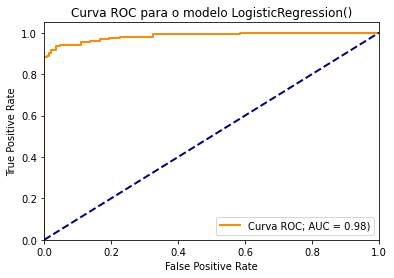

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

# mudando o target (é necessário para o cálculo da ROC)
y_test = y_test.apply(lambda x: 0 if x == "ham" else 1)

# nome do modelo
nome_modelo = "LogisticRegression()"

# pegando o modelo
modelo = modelos[nome_modelo]

# calculando os scores do modelo
y_score = modelo.predict_proba(X_test)[:, 1]

# pegando as taxas fpr e tpr
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label = 1)

# calculando o auc_roc
score = roc_auc_score(y_test, y_score)

# plotando a curva roc
plt.figure()
plt.title('Curva ROC para o modelo ' + nome_modelo)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC; AUC = %0.2f)' % score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()

Um grande uso da curva ROC é na **comparação entre diferentes modelos**:

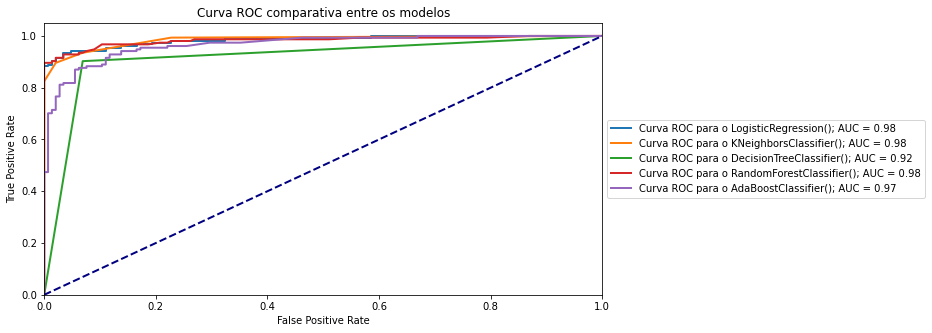

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 5))
plt.title('Curva ROC comparativa entre os modelos')

for nome_modelo in modelos.keys():
    
    # pegando o modelo
    modelo = modelos[nome_modelo]

    # calculando os scores do modelo
    y_score = modelo.predict_proba(X_test)[:, 1]

    # pegando as taxas fpr e tpr
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label = 1)

    # calculando o auc_roc
    score = roc_auc_score(y_test, y_score)

    label = "Curva ROC para o " + nome_modelo + "; AUC = " + str(round(score, 2))
    plt.plot(fpr, tpr, lw=2, label=label)
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(frameon=True, bbox_to_anchor=(1, 0.5), loc="center left")

plt.show()

___
___
___

### Quer saber mais?

[Tokenization](https://www.geeksforgeeks.org/nlp-how-tokenizing-text-sentence-words-works/)<br>
[Stemming vs Lemmatization](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)<br>
[TF-IDF](http://www.tfidf.com/)<br>
[Embeddings](https://medium.com/nwamaka-imasogie/neural-networks-word-embeddings-8ec8b3845b2e)<br>
[AUC-ROC](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)